# Identify Trends and Patterns in Campus Placement

## Life Cycle of a Machine Learning Project

   -  Understanding the Problem Statement
   - Data Collection
   - Data Checks to Perform
   - Exploratory Data Analysis
   - Data Pre-Processing
   - Model Training
   - Choose Best Model
   
   
## 1. Problem Statement
  
   - This project understands how the student's placement is affected by other variables such as Gender, 10th and 12th Percentage, 10th and 12th Board, 12th Stream, UG Percentage, UG Stream, Work Experience.
   - Which factor influenced a candidate in getting placed?
   - Does percentage matters for one to get placed?
   - Which degree specialization is much demanded by corporate?
   - Play with the data conducting all statistical tests. 
   
## 2. Data Collection
 
 
   - Dataset Source - https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement
   - Initially dataset had 15 columns and 215 rows.
   - We used an AI tool gretel.ai to genarate synthetic data and after that the rows of the dataset changes from 215 rows to 5000 rows we have added the synthetically generated data report below.
   
### 2.1. Import Data and Required Packages
   
   
   - Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/Placement Data.csv')

#### Show Top 5 Records

In [6]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,75.50,Central,61.68,Others,Commerce,60.50,Sci&Tech,Yes,68.34,Mkt&HR,61.89,Placed,280992.0
1,2,M,61.42,Central,42.00,Others,Commerce,57.11,Comm&Mgmt,No,75.74,Mkt&Fin,51.21,Placed,237099.0
2,3,M,89.40,Central,54.55,Others,Commerce,85.01,Comm&Mgmt,No,50.87,Mkt&Fin,55.50,Placed,200000.0
3,4,M,83.23,Central,75.67,Others,Commerce,79.90,Comm&Mgmt,Yes,88.18,Mkt&HR,59.28,Placed,253355.0
4,5,M,57.55,Others,51.45,Others,Science,64.35,Sci&Tech,No,78.79,Mkt&Fin,51.21,Placed,NaN


#### Shape of the Data

In [7]:
df.shape

(5000, 15)

## Dataset Details
  - sl_no : Serial Number
  - gender : Gender
  - ssc_p : Secondary Eduacation Percent - 10th Grade
  - scc_b : Board of Secondary Education - central/ others
  - hsc_p : Higher Secondary Education Percent - 12th Grade
  - hsc_b : Board Of Higher Eduation - Central/ Others
  - hsc_s : Specialization in Higher Secondary Education
  - degree_p : Degree Percent
  - degree_t : Under Graduation(Degree type) Field of degree education
  - workex : Work Experience
  - etest_p : Employability test Percent (conducted by college)
  - specialisation : Post Graduation(MBA) Specialization
  - mba_p : MBA percentage
  - status : Status of Placement (Placed/Not Placed)
  - salary : Salary Offered By corporate to candidates

## 3. Data Checks to Perform

  - Check Missing Values
  - Check Duplicates
  - Check Data Type
  - Check the Number of Unique Values of Each Column
  - Check Statistics Dataset
  - Check Various Categories Present in the Different Categorical Column

### 3.1. Check Missing Values


In [8]:
df.isna().sum()

sl_no                0
gender               0
ssc_p                0
ssc_b                0
hsc_p                0
hsc_b                0
hsc_s                0
degree_p             0
degree_t             0
workex               0
etest_p              0
specialisation       0
mba_p                0
status               0
salary            1390
dtype: int64

##### There are 1390 missing values in salary column of the data set

### 3.2. Check Duplicates

In [9]:
df.duplicated().sum()

0

##### There are no duplicate values in the data set

### 3.3. Check Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           5000 non-null   int64  
 1   gender          5000 non-null   object 
 2   ssc_p           5000 non-null   float64
 3   ssc_b           5000 non-null   object 
 4   hsc_p           5000 non-null   float64
 5   hsc_b           5000 non-null   object 
 6   hsc_s           5000 non-null   object 
 7   degree_p        5000 non-null   float64
 8   degree_t        5000 non-null   object 
 9   workex          5000 non-null   object 
 10  etest_p         5000 non-null   float64
 11  specialisation  5000 non-null   object 
 12  mba_p           5000 non-null   float64
 13  status          5000 non-null   object 
 14  salary          3610 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 586.1+ KB


### 3.4. Checking the Number of Unique Values of Each Column

In [11]:
df.nunique()

sl_no             5000
gender               2
ssc_p             2527
ssc_b                2
hsc_p             2729
hsc_b                2
hsc_s                3
degree_p          2564
degree_t             3
workex               2
etest_p           2452
specialisation       2
mba_p             1988
status               2
salary            2718
dtype: int64

In [30]:
df['gender'].value_counts()

M    3495
F    1505
Name: gender, dtype: int64

### 3.5. Check Statistics of Data Set


In [12]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3610.000000
mean,2500.500000,75.298404,55.128882,73.057918,66.697352,61.567930,251876.332133
std,1443.520003,13.082204,13.580215,12.568139,15.020827,8.390276,54442.718254
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,1250.750000,66.875000,43.510000,63.465000,52.720000,53.920000,201933.500000
50%,2500.500000,78.095000,54.750000,75.130000,63.710000,60.410000,253858.000000
75%,3750.250000,87.342500,63.442500,83.492500,76.370000,67.940000,277291.250000
max,5000.000000,89.400000,97.700000,91.000000,98.000000,77.890000,911093.000000


#### Insights

  - From above description of numerical data, all means vary in between 61.56 to 75.29.
  - All standard deviations vary in between 8.3 and 15.02.
  - While there is a minimum percentage 37 for 12th, for 10th is 40.89, for ug and etest is 50 and for mba is 51.21.

### 3.7. Exploring Data

In [13]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in '10th board' variable: ", end=" ")
print(df['ssc_b'].unique())

print("Categories in '12th board' variable: ", end=" ")
print(df['hsc_b'].unique())

print("Categories in '12th stream' variable: ", end=" ")
print(df['hsc_s'].unique())

print("Categories in 'UG Stream' variable: ", end=" ")
print(df['degree_t'].unique())

print("Categories in 'Work Experience' variable: ", end=" ")
print(df['workex'].unique())

print("Categories in 'Specialisation' variable: ", end=" ")
print(df['specialisation'].unique())

print("Categories in 'Status' variable: ", end=" ")
print(df['status'].unique())

Categories in 'gender' variable:  ['M' 'F']
Categories in '10th board' variable:  ['Central' 'Others']
Categories in '12th board' variable:  ['Others' 'Central']
Categories in '12th stream' variable:  ['Commerce' 'Science' 'Arts']
Categories in 'UG Stream' variable:  ['Sci&Tech' 'Comm&Mgmt' 'Others']
Categories in 'Work Experience' variable:  ['Yes' 'No']
Categories in 'Specialisation' variable:  ['Mkt&HR' 'Mkt&Fin']
Categories in 'Status' variable:  ['Placed' 'Not Placed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 7 numerical features: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
We have 8 categorical features: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


## 4. Exploring Data (Visualization)

### 4.1. Visualize average score distribution to make some conclusion.

  - Histogram
  - Kernel Distribution Function (KDE)
  
  
  
#### 4.1.1. Histogram & KDE

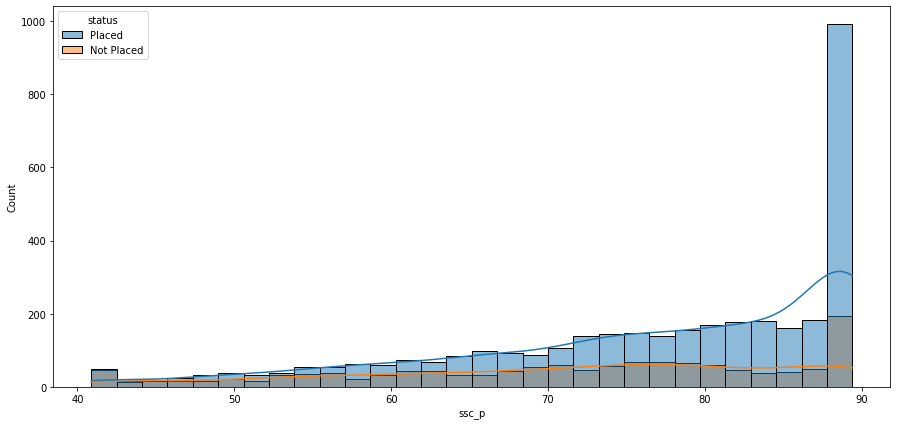

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(111)
sns.histplot(data = df, x = 'ssc_p', bins = 30, kde = True, hue = 'status')
plt.show()

#### Insights

  - Students with better score in 10th have better placement rate.

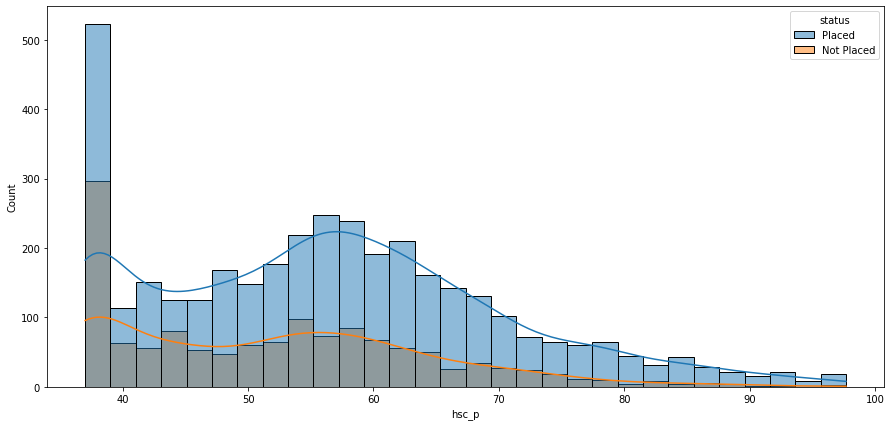

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(111)
sns.histplot(data = df, x = 'hsc_p', bins = 30, kde = True, hue = 'status')
plt.show()

#### Insights

  - Students with average score in 12th have better placement rate.

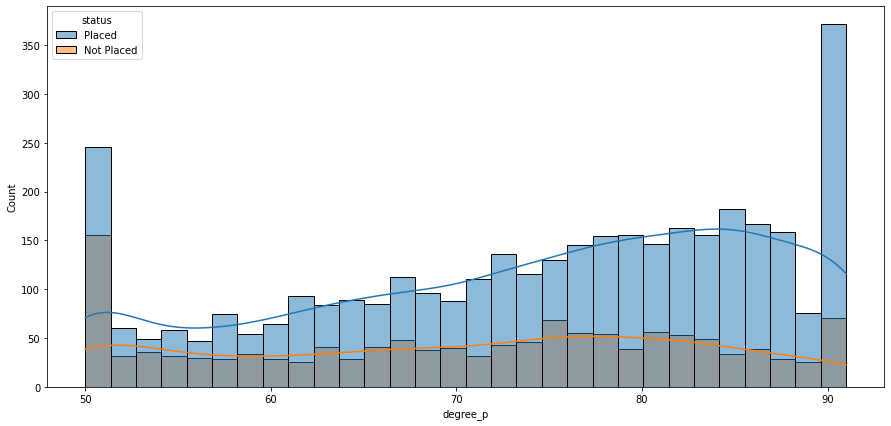

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(111)
sns.histplot(data = df, x = 'degree_p', bins = 30, kde = True, hue = 'status')
plt.show()

#### Insights

  - Students with 75-90 percent score in graduation have better placement rate.

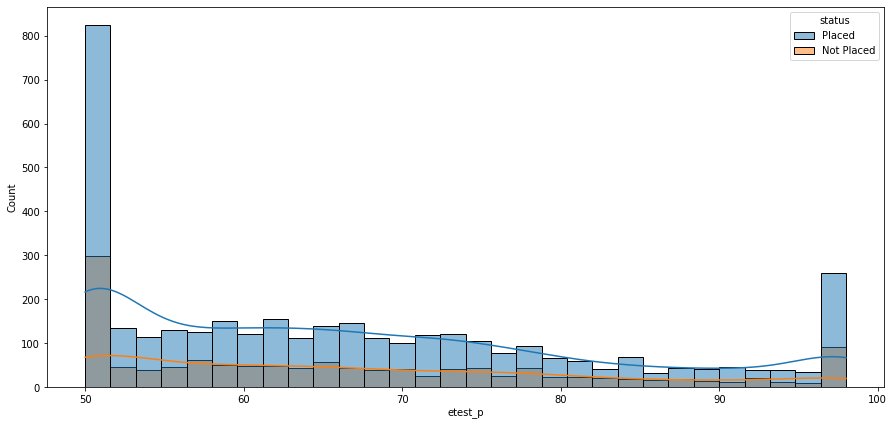

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(111)
sns.histplot(data = df, x = 'etest_p', bins = 30, kde = True, hue = 'status')
plt.show()

#### Insights

  - As we can see students with minimum score in employbility test have better placement rate.

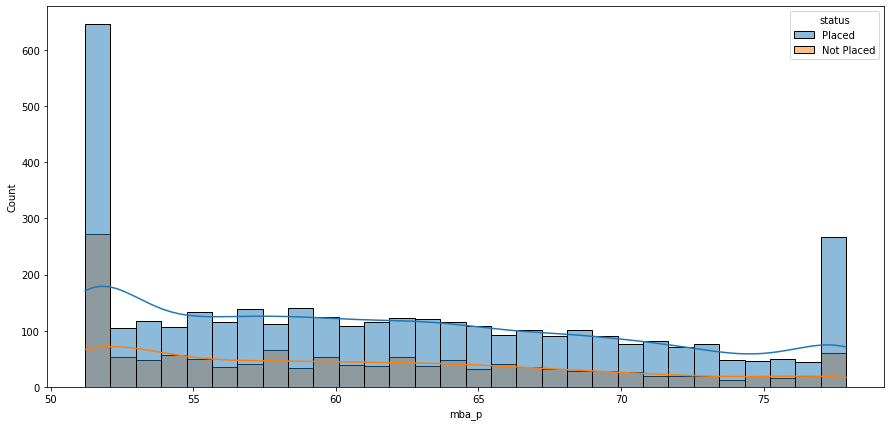

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(111)
sns.histplot(data = df, x = 'mba_p', bins = 30, kde = True, hue = 'status')
plt.show()

#### Insights

  - As we can see in the above graph MBA percentage does not affect much in the placement of the students.

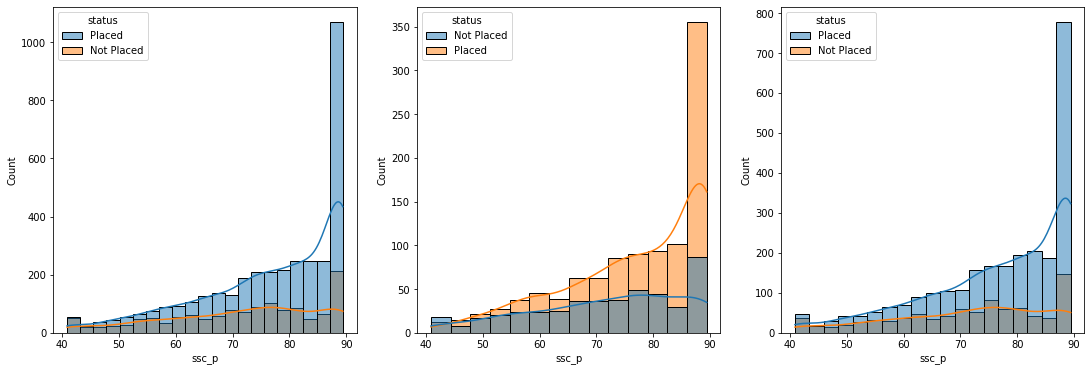

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'ssc_p', kde = True, hue = 'status')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'F'], x = 'ssc_p', kde = True, hue = 'status')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'M'], x = 'ssc_p', kde = True, hue = 'status')
plt.show()

#### Insights

  - Students who have performed better in 10th score have also performed better in placement as well be it a male or a female.

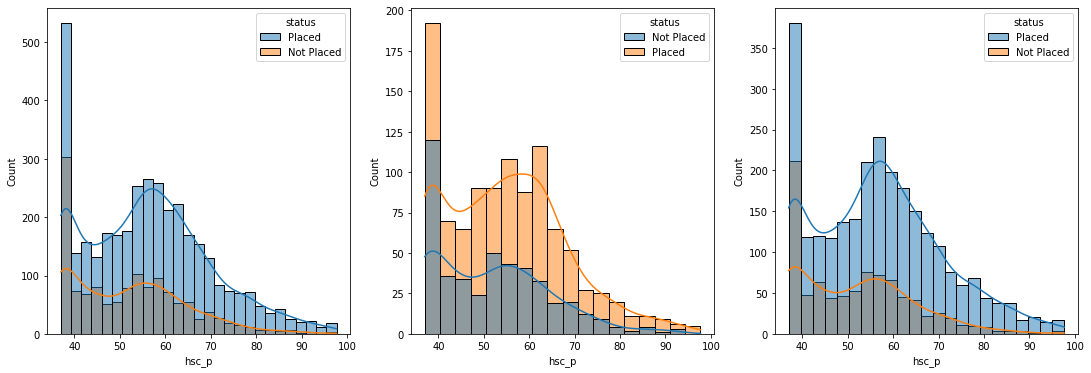

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'hsc_p', kde = True, hue = 'status')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'F'], x = 'hsc_p', kde = True, hue = 'status')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'M'], x = 'hsc_p', kde = True, hue = 'status')
plt.show()

#### Insights

  - Both the genders with average score in 12th have performed well in placement.

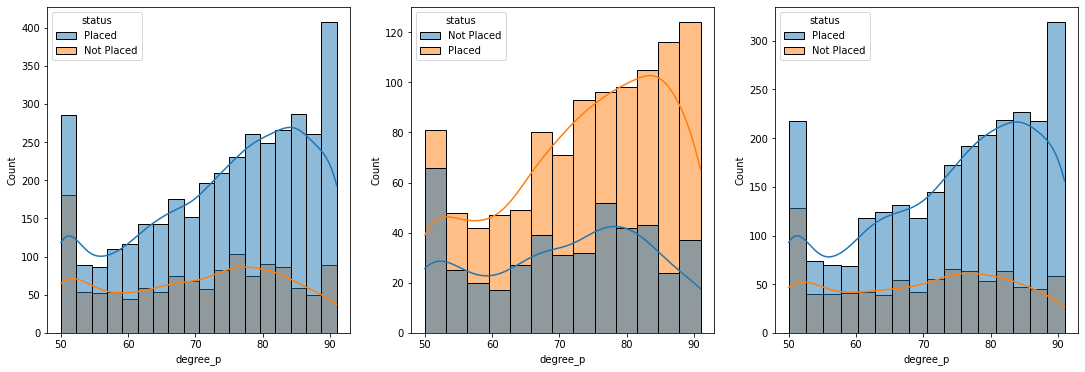

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'degree_p', kde = True, hue = 'status')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'F'], x = 'degree_p', kde = True, hue = 'status')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'M'], x = 'degree_p', kde = True, hue = 'status')
plt.show()

#### Insights

  - Both the genders with score of 75 to 90 percent in graduation have performed well in placement.

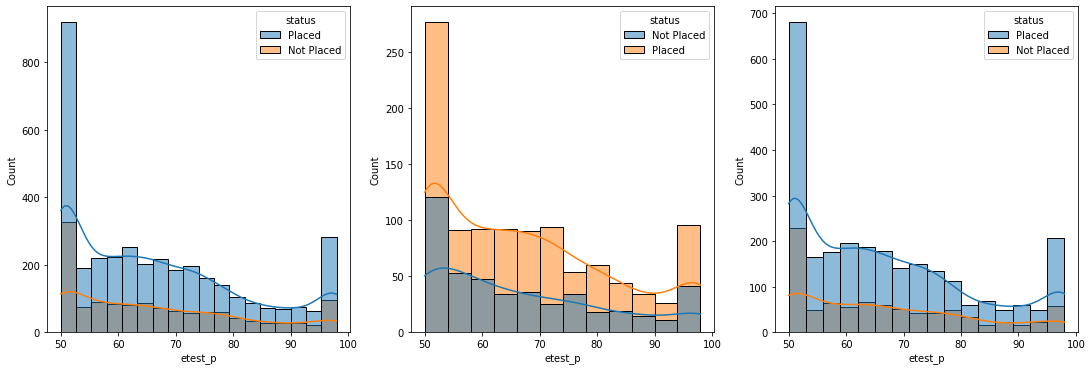

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'etest_p', kde = True, hue = 'status')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'F'], x = 'etest_p', kde = True, hue = 'status')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'M'], x = 'etest_p', kde = True, hue = 'status')
plt.show()

#### Insights

  - Employbility score does not affect any of the gender as minimum scoring students also got placed.

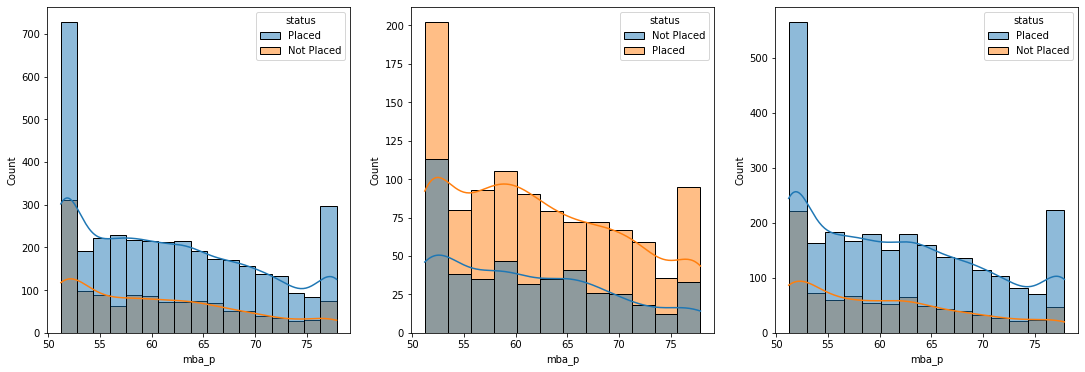

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'mba_p', kde = True, hue = 'status')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'F'], x = 'mba_p', kde = True, hue = 'status')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'M'], x = 'mba_p', kde = True, hue = 'status')
plt.show()

#### Insights

  - MBA score does not affect more in placements niether for male students nor for female.

### 4.2. Maximum Score of Students in All Standards

<AxesSubplot:title={'center':'PG Score'}, ylabel='mba_p'>

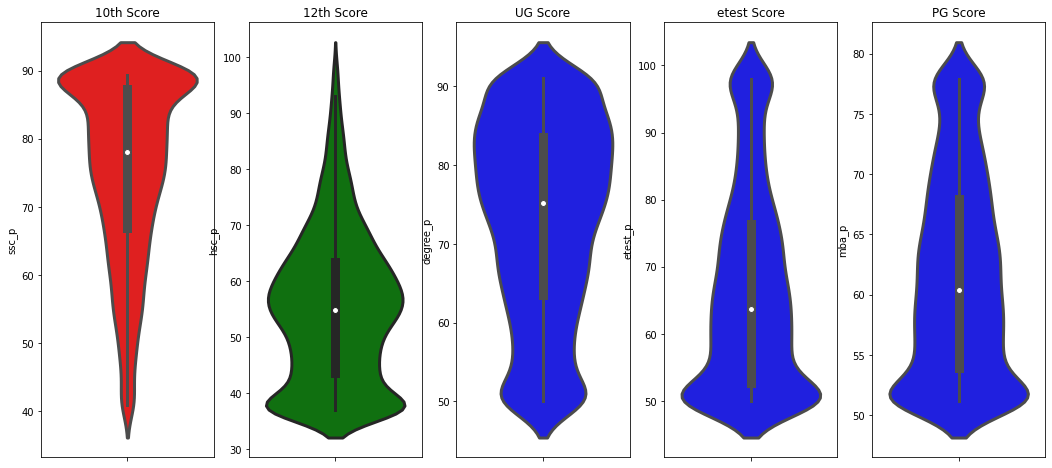

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1,5,1)
plt.title('10th Score')
sns.violinplot(y='ssc_p', data = df, color = 'red', linewidth = 3)
plt.subplot(1,5,2)
plt.title('12th Score')
sns.violinplot(y='hsc_p', data = df, color = 'green', linewidth = 3)
plt.subplot(1,5,3)
plt.title('UG Score')
sns.violinplot(y='degree_p', data = df, color = 'blue', linewidth = 3)
plt.subplot(1,5,4)
plt.title('etest Score')
sns.violinplot(y='etest_p', data = df, color = 'blue', linewidth = 3)
plt.subplot(1,5,5)
plt.title('PG Score')
sns.violinplot(y='mba_p', data = df, color = 'blue', linewidth = 3)

### 4.3. Multivariate Analysis Using Pieplot

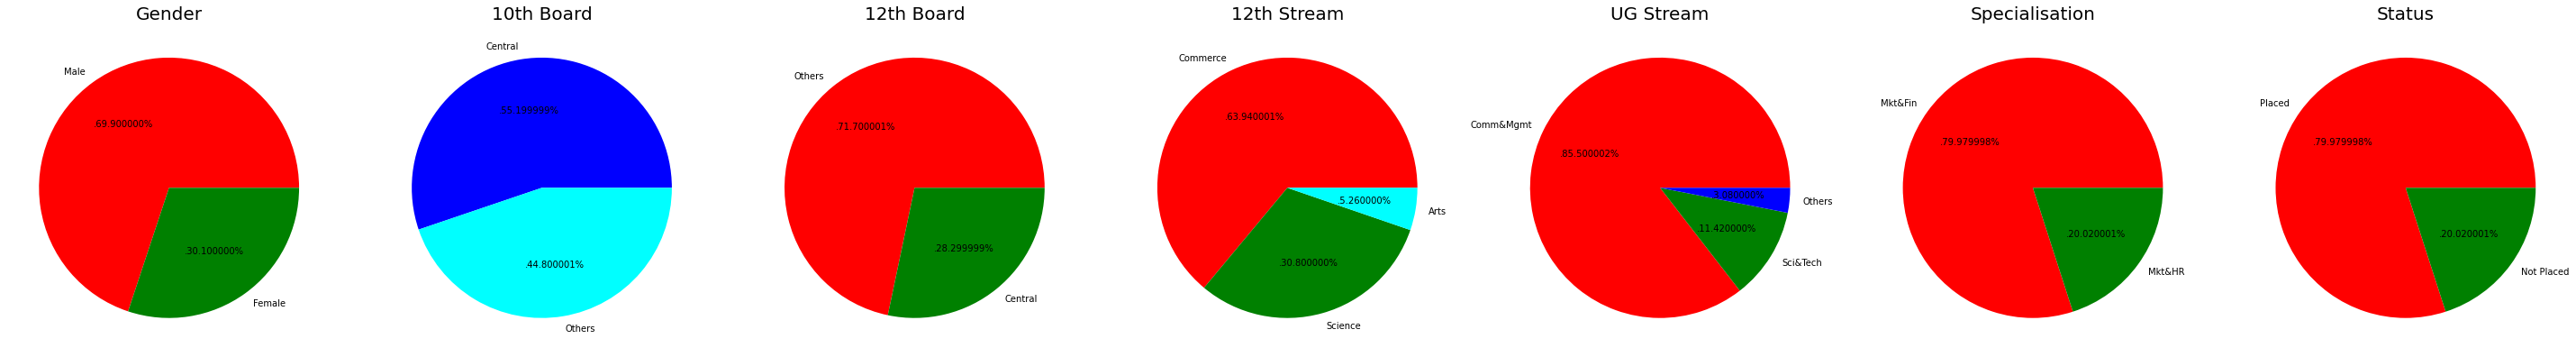

In [49]:
plt.rcParams['figure.figsize'] = (40,20)

plt.subplot(1,7,1)
size = df['gender'].value_counts()
labels = 'Male','Female'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,2)
size = df['ssc_b'].value_counts()
labels = 'Central', 'Others'
color = ['blue', 'cyan']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('10th Board', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,3)
size = df['hsc_b'].value_counts()
labels = 'Others', 'Central'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('12th Board', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,4)
size = df['hsc_s'].value_counts()
labels = 'Commerce', 'Science', 'Arts'
color = ['red','green', 'cyan']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('12th Stream', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,5)
size = df['degree_t'].value_counts()
labels = 'Comm&Mgmt', "Sci&Tech", 'Others'
color = ['red','green', 'blue']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('UG Stream', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,6)
size = df['specialisation'].value_counts()
labels = 'Mkt&Fin', "Mkt&HR"
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Specialisation', fontsize = 20)
plt.axis('off')

plt.subplot(1,7,7)
size = df['specialisation'].value_counts()
labels = 'Placed', "Not Placed"
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Status', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights

  - Most of the students are male in the dataset
  - Most of the students are from Central board in 10th and from Others in 12th.
  - Most of the students have chosed commerce in 12th.
  - Most of the students have chosed Comm&Mgmt in UG.
  - Most of the students have chosed Mkt&Fin instead of Mkt&HR specialisation in MBA
  - Almost 80 percent of the students got placed

### 4.4. Feature Wise Visualization

#### 4.4.1. Gender Column

  - How is distribution of Gender?
  - Is gender has any impact on student's performance?

#### Univariate Analysis (How is distribution of Gender?)

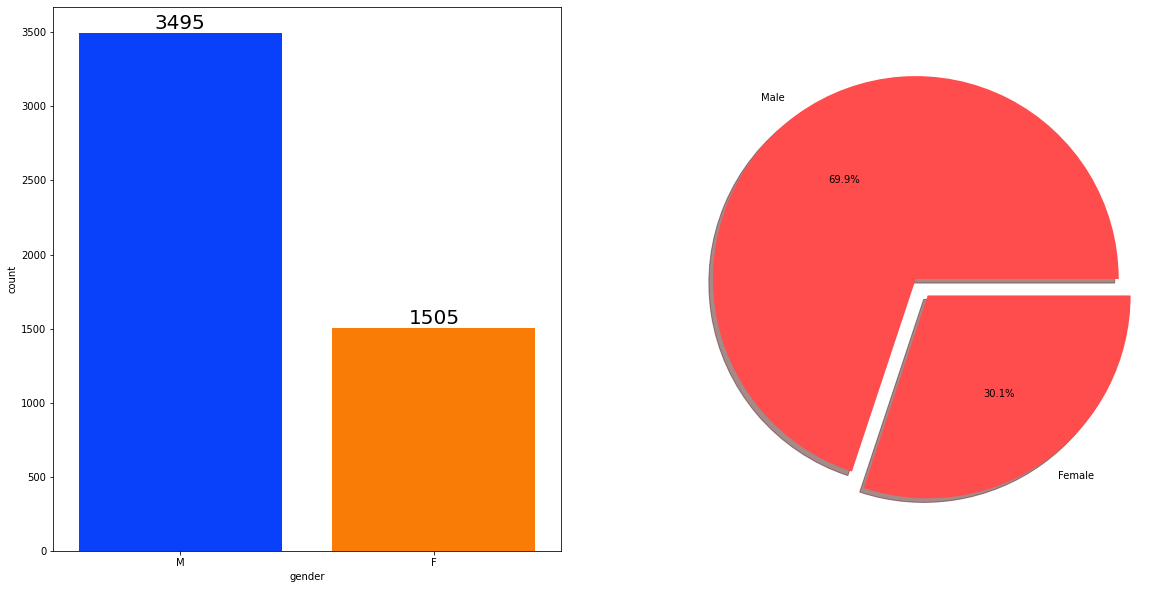

In [50]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x = df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0,0.1], autopct = '%1.1f%%', shadow = True, colors=['#ff4d4d'])
plt.show()

#### Insights

  - Gender has imbalanced data with female students are 1505(30%) and male students are 3495(70%)

### 4.5. Finding Correlation and Heatmap

In [53]:
corr = df.corr()

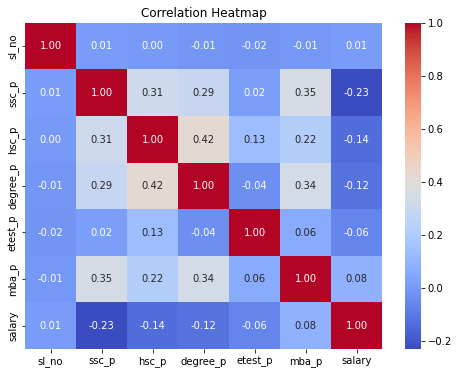

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 4.6. Checking Outliers

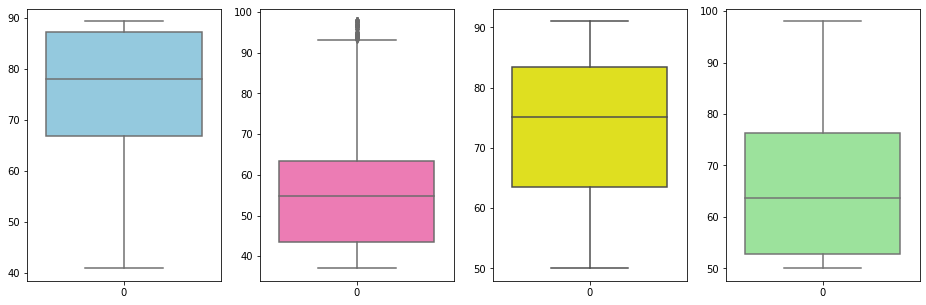

In [55]:
plt.subplots(1,4,figsize = (16,5))
plt.subplot(141)
sns.boxplot(df['ssc_p'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['hsc_p'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['degree_p'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['etest_p'], color = 'lightgreen')
plt.show()

#### Multivariate Analysis using Pairplot

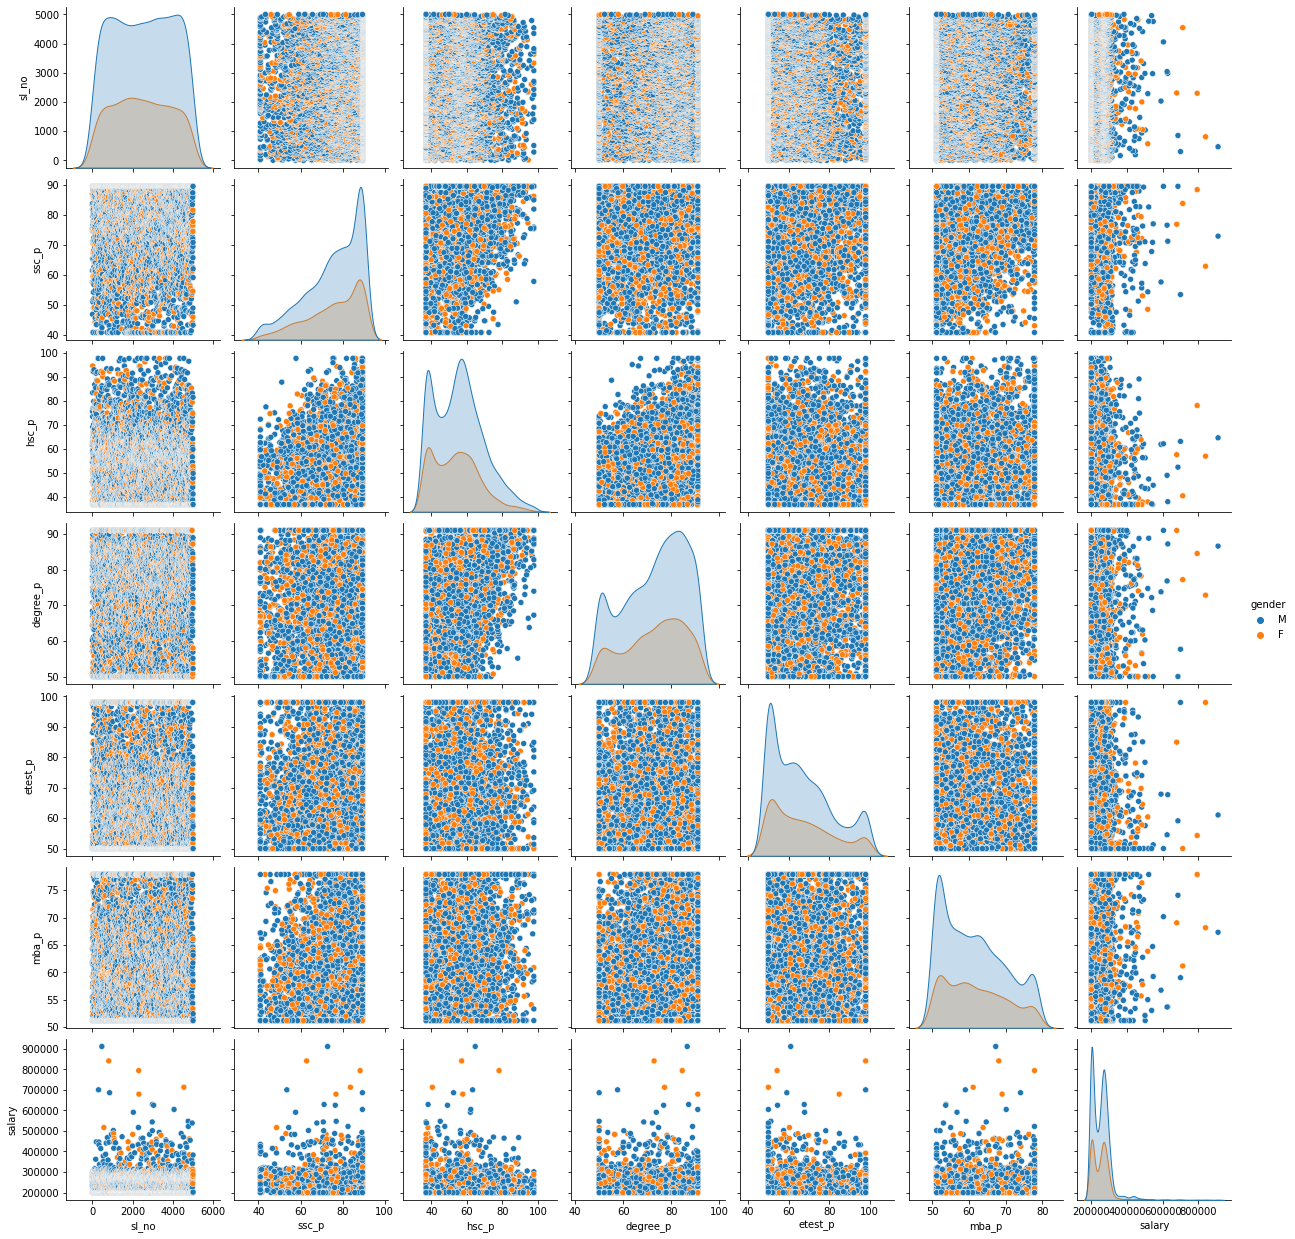

In [59]:
sns.pairplot(df, hue = 'gender')
plt.show()

## Model Training

In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [62]:
df1 = pd.DataFrame(df)
columns_to_encode = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

label_encoders = {}
for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df[col])
    

df1 = pd.DataFrame(df1)
columns_to_standardize = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

scaler = StandardScaler()
df1[columns_to_standardize] = scaler.fit_transform(df1[columns_to_standardize])


In [66]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,0.015411,0,0.482450,1,1,-0.999287,2,1,0.109369,1,0.038390,1,280992.0
1,2,1,-1.060967,0,-0.966862,1,1,-1.269043,0,0,0.602068,0,-1.234639,1,237099.0
2,3,1,1.078030,0,-0.042631,1,1,0.951078,0,0,-1.053799,0,-0.723282,1,200000.0
3,4,1,0.606350,0,1.512728,1,1,0.544453,0,1,1.430334,1,-0.272716,1,253355.0
4,5,1,-1.356819,1,-0.270927,1,2,-0.692926,2,0,0.805139,0,-1.234639,1,NaN


In [76]:
X = df1.drop(columns=['sl_no','salary','status'], axis=1)

In [77]:
y = df1.iloc[:,-2]

In [78]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,0.015411,0,0.482450,1,1,-0.999287,2,1,0.109369,1,0.038390
1,1,-1.060967,0,-0.966862,1,1,-1.269043,0,0,0.602068,0,-1.234639
2,1,1.078030,0,-0.042631,1,1,0.951078,0,0,-1.053799,0,-0.723282
3,1,0.606350,0,1.512728,1,1,0.544453,0,1,1.430334,1,-0.272716
4,1,-1.356819,1,-0.270927,1,2,-0.692926,2,0,0.805139,0,-1.234639
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,-0.986049,0,-1.335082,1,1,-1.199018,0,0,-0.792802,0,0.541403
4996,1,-0.344656,0,1.945018,1,1,1.265396,0,1,-0.628347,0,-0.374033
4997,1,-2.446194,0,-1.012521,0,1,0.554798,0,0,-1.111725,1,-1.234639
4998,1,-1.015863,0,-1.335082,1,1,-1.656570,0,0,-0.901329,0,0.187387


In [79]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    0
4997    1
4998    0
4999    0
Name: status, Length: 5000, dtype: int32

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [82]:
X_train.shape, X_test.shape

((4000, 12), (1000, 12))

In [83]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [86]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'NB' : GaussianNB()
}

In [87]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)
    print("=" * 50)

Model: Random Forest
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.08      0.14       259
           1       0.75      0.97      0.85       741

    accuracy                           0.74      1000
   macro avg       0.62      0.53      0.50      1000
weighted avg       0.68      0.74      0.66      1000

Model: Gradient Boosting
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.03      0.06       259
           1       0.74      0.97      0.84       741

    accuracy                           0.73      1000
   macro avg       0.51      0.50      0.45      1000
weighted avg       0.62      0.73      0.64      1000

Model: SVM
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       259
           1       0.74      1.00      0.85       741

    accurac